# Tâche 8
- François Clinquart 
- NOMA : 59602100
- LMAPR1492 Physique des matéraiux 
DEADLINE : le lundi, 11 mars 2024 

## importation des modules nécessaires 

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
## IMPORTATION IMPORTANTE
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.bandstructure import PhononBandStructure

# Mon Matériaux - le ScSnAu
Il s'agit d'un Cristal cubique de groupe ponctuel : -43m

In [2]:
mp_key = "ER5V8i0JUw7k31Nk5IpkvogP61BDz9cw"
mp_id = "mp-2894" #ScSnAu

In [3]:
with MPRester(mp_key) as m:
    elec_struct = m.get_bandstructure_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
    

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Délivrables
calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin.


la premiére zone de Brillouin est la maille primitive dans le réseau réciproque 

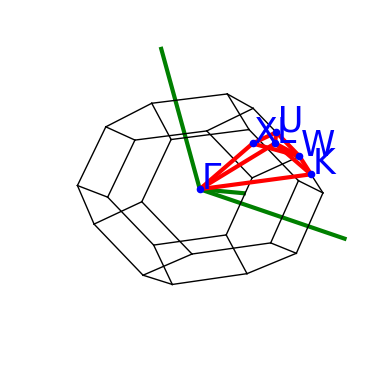

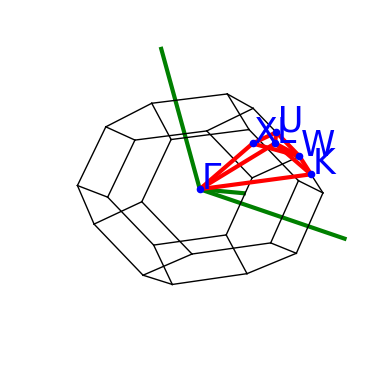

In [4]:
plot = BSPlotter(elec_struct)
plot.plot_brillouin()

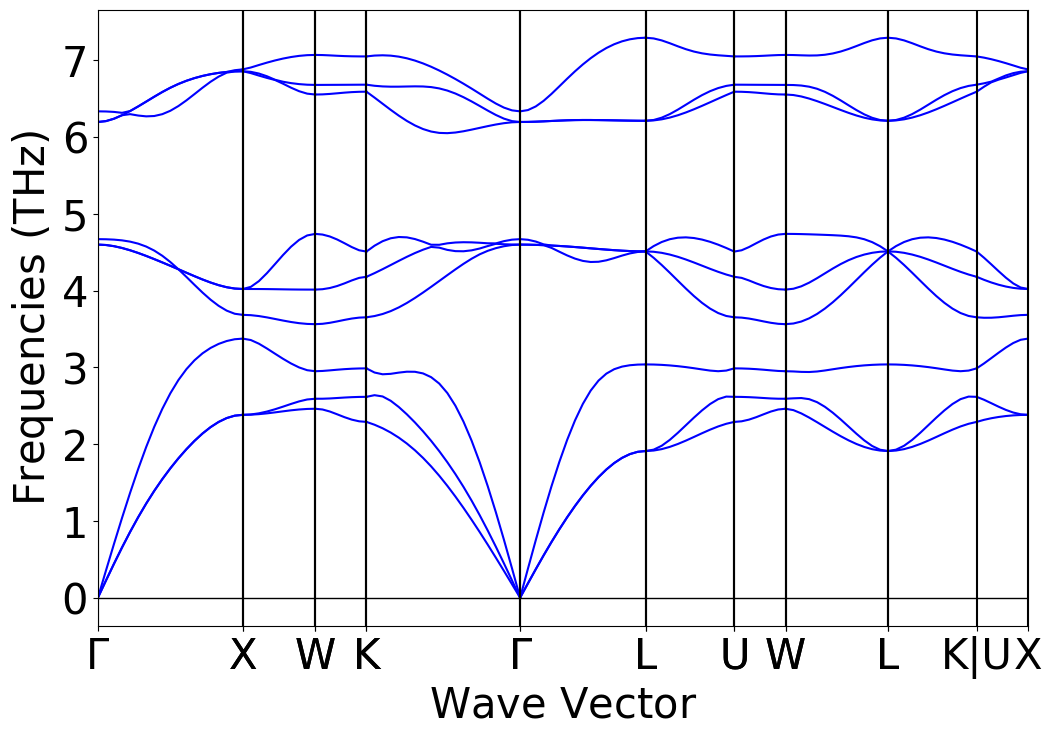

In [6]:
plot = PhononBSPlotter(ph_bs)
plot.bs_plot_data()
plot.show(units ='thz')


Il apparaît donc des bandes interdites (band gap) dans la structure électronique.

## Calcul de la vitesse de son pour trois branche acoustique différentes dans la zone de brillouin 

Basé sur le chapitre 2 du syllabus du Prof. Le modèle de Debye fait l’hypothèse que toutes les fréquences $ω_σ(q)$ ont la même dispersion linéaire:
$ w_\sigma(q) = q \nu$

avec $\nu$ la vitesse recherché

Et la vitesse de groupe $v_g$ est defini par 

$v_g = \frac{\partial \omega}{\partial q}$



Donc pour les modes acoustiques, la vitesse du son est égale à la vitesse de phase. **Donc je ne considère ici que les modes acoustiques**

Une branche acoustique est une branche dont les fréquences associées aux vibrations des phonons sont basses dans la zone de Brillouin. Ces branches sont reconnaissables par leur caractère linéaire lorsque le fréquence tend vers 0 et donc approximable par le modèle de Debye. Dans mon cristal, on voit que les zone linéaire sont $\Gamma -  X $, $ K - \Gamma $ et $ \Gamma - L$

Nous serons particulièrement intéressés par la nature linéaire de ces branches. En effet, la vitesse de propagation du son dans le matériau est déterminée par la pente des branches acoustiques lorsque la fréquence tend vers 0. Ainsi, on a : $\nu = \frac{\partial \omega}{\partial q} \lvert_{w = 0}$

In [21]:
#Extraction des données : 
data = PhononBSPlotter(ph_bs).bs_plot_data()
f = data['frequency']
d = data['distances'] 
print(f[0][0][2])

0.44296008980493745


**Attention** : 
- f est en `teraHertz` et leur dimnsions est donc en $\frac{1}{10^{12}m}$
- d est une distance en Amgström 


et $ 1 [A]  = 1e-10 [m]$

              

In [11]:
direct = "première"
w= 0
y= 0

dw = 2*np.pi*(f[w][y][2] - f[w][y][0])*10**12 # Rad/S
dk = (d[w][2] - d[w][0])*10**10 # M 
nu = dw/dk # en gros, je ne calcule pas le dérivée directement, mais j'utilise la définition de dérivé = pente de la courbe

v = nu*3.6
print("la vitesse du son dans la {} direction est {} m/s ( {} ) km/h".format(direct, str(nu) , str(v)))

#C'est fort rapide par rapport à la vitesse du son dans l'air, j'ai du faire une erreur 

la vitesse du son dans la première direction est 2560.334731214367 m/s ( 9217.205032371721 ) km/h


In [20]:
direct = "seconde"
w= 3
y= 1

dw = 2*np.pi*(f[w][y][2] - f[w][y][0])*10**12 # Rad/S
dk = (d[w][2] - d[w][0])*10**10 # M 
nu = dw/dk # en gros, je ne calcule pas le dérivée directement, mais j'utilise la définition de dérivé = pente de la courbe

v = nu*3.6
print("la vitesse du son dans la {} direction est {} m/s ( {} ) km/h".format(direct, str(nu) , str(v)))

#C'est fort lent par rapport à la vitesse du son dans l'air, j'ai du faire une erreur 

la vitesse du son dans la seconde direction est -13759.269580942553 m/s ( -49533.370491393194 ) km/h


In [15]:
direct = "trosième"
w= 4
y= 2

dw = 2*np.pi*(f[w][y][2] - f[w][y][0])*10**12 # Rad/S
dk = (d[w][2] - d[w][0])*10**10 # M 
nu = dw/dk # en gros, je ne calcule pas le dérivée directement, mais j'utilise la définition de dérivé = pente de la courbe

v = nu*3.6
print("la vitesse du son dans la {} direction est {} m/s ( {} ) km/h".format(direct, str(nu) , str(v)))

#C'est fort rapide par rapport à la vitesse du son dans l'air, j'ai du faire une erreur 

la vitesse du son dans la trosième direction est 4454.2012468252005 m/s ( 16035.124488570722 ) km/h
